In [1]:
%matplotlib notebook

In [2]:
from create_ice_cube_image_data import *
from numba import jit
fbatch={'1':"/scratch/ICE-CUBE/batch_1.parquet"}
ice_cube=ice_cube_data(fbatch=fbatch,
                       fsensor="/scratch/ICE-CUBE/sensor_geometry.csv",
                       fmetaf="/scratch/ICE-CUBE/train_meta.parquet",
                       every_nth_event=10,
                       width={'x':10,'y':10,'z':60})

In [3]:
#import matplotlib.pyplot as plt
#threedee = plt.figure(figsize=(5, 5)).gca(projection='3d')
#threedee.scatter(ice_cube.events['x'],ice_cube.events['y'],ice_cube.events['z'])
#plt.show()

In [4]:
img_data, labels= ice_cube.create_img_data()
img_data.shape

(19976, 11, 11, 61)

In [5]:
eventdict={}
for ievent,indexevent in enumerate(ice_cube.events.index.unique().to_list()):
    eventdict[ievent]=indexevent
    

In [6]:
eventdraw=200

<IPython.core.display.Javascript object>


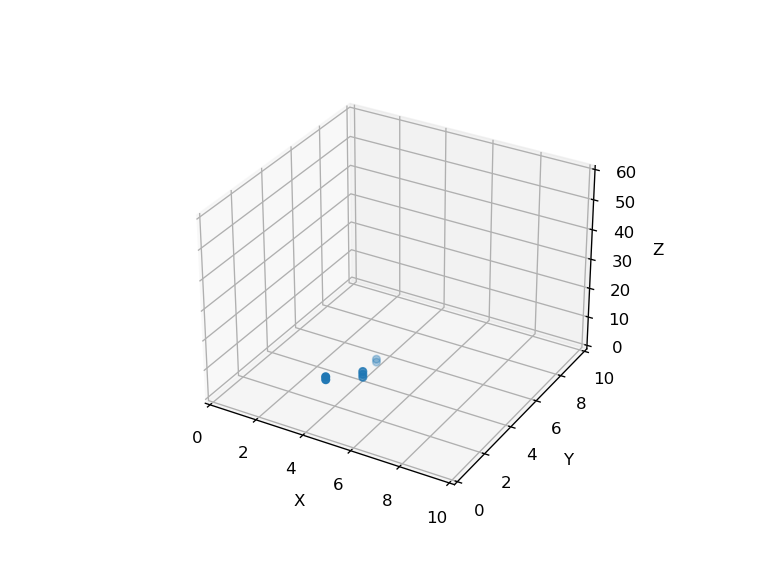

In [7]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# create a meshgrid for the x, y, and z coordinates
#x, y, z = np.meshgrid(np.arange(img_width), np.arange(img_height), np.arange(img_depth))
x,y,z,=img_data[eventdraw].nonzero()

# plot the 3D image using the meshgrid and the pixel values
ax.scatter(x,y,z)#, c=x_train[0].flatten(),cmap='gray_r',s=20)

# set the axis labels and limits
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_xlim([0, 10])
ax.set_ylim([0, 10])
ax.set_zlim([0, 60])

# show the 3D plot
plt.show()

<IPython.core.display.Javascript object>


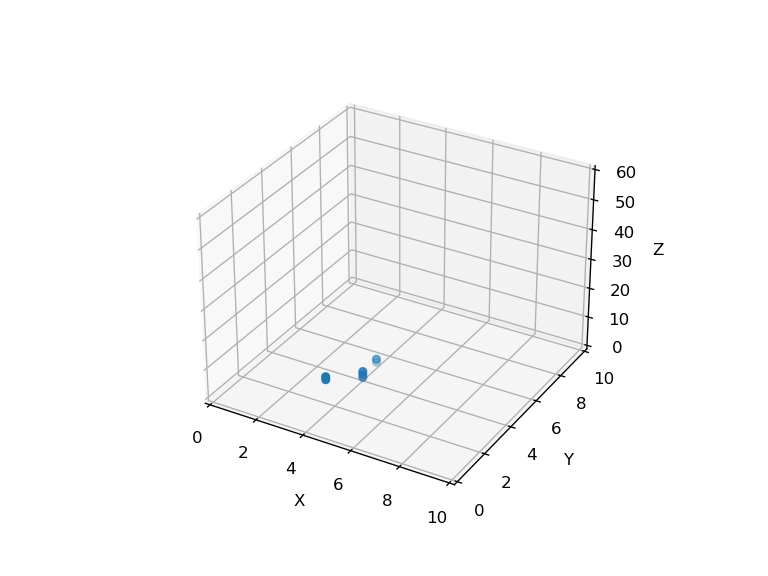

In [8]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# plot the 3D image using the meshgrid and the pixel values
ax.scatter(ice_cube.events.loc[eventdict[eventdraw]]['x'],ice_cube.events.loc[eventdict[eventdraw]]['y'],ice_cube.events.loc[eventdict[eventdraw]]['z'])

# set the axis labels and limits
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_xlim([0, 10])
ax.set_ylim([0, 10])
ax.set_zlim([0, 60])

# show the 3D plot
plt.show()

<IPython.core.display.Javascript object>


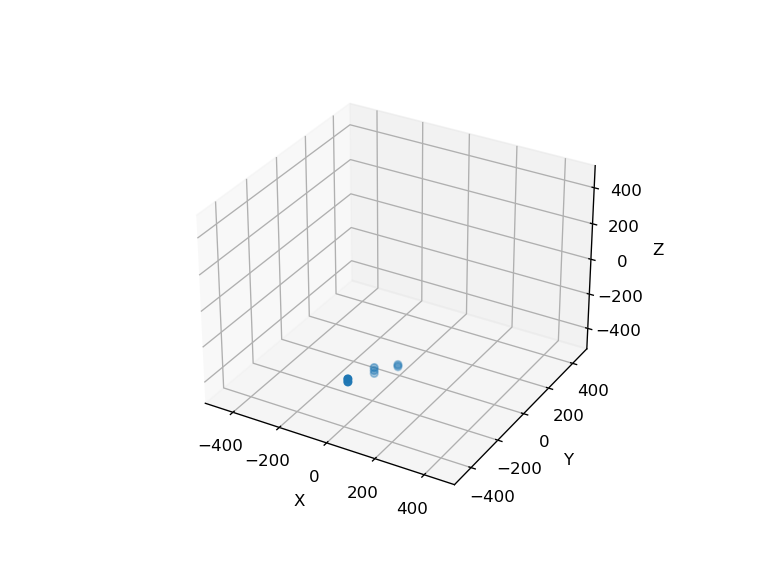

In [9]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# plot the 3D image using the meshgrid and the pixel values
ax.scatter(ice_cube.realevents.loc[eventdict[eventdraw]]['x'],ice_cube.realevents.loc[eventdict[eventdraw]]['y'],ice_cube.realevents.loc[eventdict[eventdraw]]['z'])

# set the axis labels and limits
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_xlim([-500, 500])
ax.set_ylim([-500, 500])
ax.set_zlim([-500, 500])

# show the 3D plot
plt.show()

In [18]:
img_data=img_data.reshape(19976, 11, 11, 61,1)
img_data.shape

(19976, 11, 11, 61, 1)

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(img_data, labels, test_size=0.9, random_state=42)

In [ ]:
import tensorflow as tf
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv3D, MaxPooling3D, Flatten, Dense

# create a sequential model
model = Sequential()

# add a 3D convolutional layer with 32 filters, a 3x3x3 kernel size, and ReLU activation
model.add(Conv3D(32, (3, 3, 3), activation='relu', input_shape=X_train[0].shape))

# add a 3D max pooling layer with a 2x2x2 pool size
model.add(MaxPooling3D(pool_size=(2, 2, 2)))

# flatten the output of the previous layer
model.add(Flatten())

# add a fully connected (Dense) layer with 128 units and ReLU activation
model.add(Dense(100, activation='relu'))

# add the output layer with 2 units (assuming 2 classes) and softmax activation
model.add(Dense(2, activation='relu'))

# compile the model with categorical crossentropy loss and Adam optimizer
model.compile(loss='mse', optimizer='adam',metrics=["categorical_accuracy"])

# assuming X_train contains the image data and y_train contains the labels, fit the model
model.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
63/63 [==============================] - 24s 370ms/step - loss: 4875.6503 - categorical_accuracy: 0.6920
Epoch 2/10
22/63 [=========>....................] - ETA: 15s - loss: 90.8512 - categorical_accuracy: 0.7482

In [14]:
model.predict(X_test)

array([[3.3523064, 1.6334013],
       [3.0726368, 1.4705664],
       [3.3016977, 1.6039348],
       ...,
       [3.6870022, 1.8282745],
       [3.175772 , 1.5306158],
       [3.0971947, 1.4848651]], dtype=float32)

In [15]:
y_test

array([[0.94508907, 0.95951747],
       [5.65882984, 1.90126589],
       [1.88886769, 1.63288643],
       ...,
       [5.220317  , 1.2025196 ],
       [4.67655836, 0.56589352],
       [1.27076079, 1.96728187]])

In [16]:
model.predict(X_train)

array([[3.2694697, 1.5851704],
       [3.2787063, 1.5905483],
       [3.272425 , 1.586891 ],
       ...,
       [3.2412245, 1.568725 ],
       [3.1320841, 1.505179 ],
       [3.283954 , 1.5936037]], dtype=float32)

In [17]:
y_train

array([[2.52390012, 1.98451501],
       [0.40319757, 1.88553954],
       [5.9756894 , 1.29174705],
       ...,
       [1.00830781, 1.47696171],
       [1.69339758, 2.64340489],
       [5.09152236, 2.33969504]])